<a href="https://colab.research.google.com/github/ARUGA0106/Datalab/blob/main/ML_Business_Churn_predictive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model accuracy: 0.79


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Precision: 0.6959247648902821
Recall: 0.5951742627345844
F1 Score: 0.6416184971098265


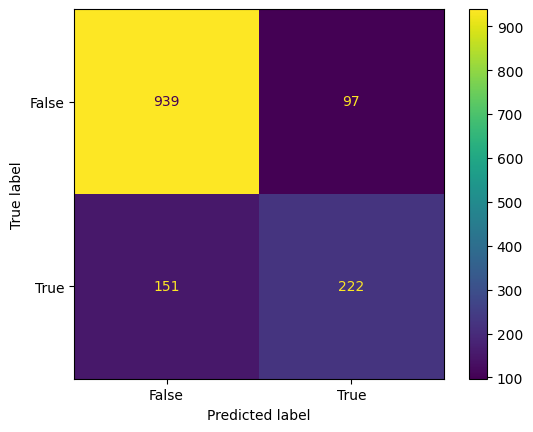

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import joblib  # Ensure that joblib is imported
from sklearn.pipeline import make_pipeline


# load the telco churn dataset
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

# Pre-processing

# Binary encode categorical variables
df.drop('customerID', axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Prepare feature matrix and target vector
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression object
model = LogisticRegression()

# Train the model on the training set
# perform autoscalling to avoid iteration error and convergence

scaler = StandardScaler()
model = LogisticRegression(max_iter=1000)
pipeline = make_pipeline(scaler, model)
pipeline.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = pipeline.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

# Save the model to a file
joblib_file = "simba.pkl"
joblib.dump(pipeline, joblib_file)

# Download the file to your local machine
from google.colab import files
files.download(joblib_file)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()

# Print the evaluation metrics and plot the confusion matrix
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



**ML MODEL FOR BUSINESS CHURN PREDICTION**

Godwin s.Aruga

Data Analyst & ML

CyberCoders TM, DIT, IEEE.

DataLab project.

This model addresses the problem of predicting customer churn for a telecommunications company using the Telco Customer Churn dataset. Customer churn refers to the phenomenon where customers stop using a company's service. Predicting churn is crucial for businesses as it allows them to take proactive measures to retain customers, thereby reducing loss and improving profitability.

The model employs Logistic Regression, a widely used statistical method for binary classification problems. The dataset is first preprocessed by encoding categorical variables into binary format and dropping irrelevant columns, such as 'customerID'. The data is then split into training and testing sets to evaluate the model's performance. To enhance the model's accuracy and ensure convergence during training, the features are standardized using StandardScaler, which scales the data to have a mean of zero and a standard deviation of one.

A pipeline is created to streamline the preprocessing and modeling steps, combining the StandardScaler and LogisticRegression into a single workflow. The model is trained on the training set and evaluated on the testing set, achieving an accuracy score that quantifies its performance. Key performance metrics such as precision, recall, and F1 score are also calculated to provide a comprehensive evaluation of the model's ability to predict churn. Additionally, a confusion matrix is plotted to visualize the model's performance in distinguishing between churned and non-churned customers.

The trained model is then saved to a file using joblib for future use and downloaded from Google Colab to a local machine. This model can be integrated into a user-friendly front-end application to make predictions on new customer data, helping the business to identify at-risk customers and take measures to retain them.

ASANTE SANA,